# Demo notebook to start working on the GBM Hackathon data
This notebook demonstrates how the MOSAIC ([Owkin](https://www.mosaic-research.com/)) and BRUCE ([PICI](https://www.parkerici.org/)) data can be loaded.

## Setup

In [1]:
# Load packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tiffslide
import seaborn as sns
import gget
import tifffile
import zarr

# MosaicDataset and BruceDataset classes allow loading and visualisation of the different data sources
from gbmhackathon import MosaicDataset, BruceDataset

## Start exploring the MOSAIC data

In [2]:
# Look at the available data sources
MosaicDataset.sources.keys()

dict_keys(['clinical', 'bulk_rna', 'spatial', 'sc_rna', 'wes', 'he'])

In [3]:
# The following cell will returns a dictionary with the data sources in the
# keys and the list of files (and path) used to return the data.
source_dict_mosaic = MosaicDataset.load_tabular()

### Load the MOSAIC sample table
Not every data modality is available for each MOSAIC sample. The following table provides information on which modality is available for each sample.

In [4]:
filename_sample_table = "/home/ec2-user/SageMaker/data/mosaic_dataset/Data availibility per modality per patient.csv"
sample_table = pd.read_csv(filename_sample_table, index_col=0)
sample_table.head(2)

,Visium_usable,WES_usable,scRNAseq_usable,bulkRNAseq_usable,HE_usable,Clinical_usable
Hackathon_ID,,,,,,
HK_G_001a,Yes,Yes,Yes,Yes,Yes,Yes
HK_G_002a,Yes,Yes,Yes,Yes,Yes,Yes


### Load and explore the six MOSAIC data modalities

#### 1. Clinical data

In [5]:
# To access the clinical data, specify the correct keys
clin_df = source_dict_mosaic["clinical"]["processed gbm clinical"]
clin_df.head(2)

,patient_id,cohort_code,cancer_indication,sample_source,sample_origin,sample_collection_chronology,administrative_gender,smoking_status,smoking_quantity_pack_years,alcohol_intake,...,idh1_r132h_expression_ihc,tert_promoter_mutation,mgmt_promoter_methylation,egfr_mutation,egfr_amplification,pten_mutation,ntrk_fusion,histone_h3_g34_mutation_sequencing,histone_h3_k27m_mutation_sequencing,time_interval_sample_harvest_dearchival_years
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,HK_G_001,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Male,NaN,NaN,NaN,...,Negative,NaN,Methylated,NaN,NaN,NaN,NaN,NaN,NaN,8.251882
HK_G_002a,HK_G_002,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Male,Former smoker,14.0,Non drinker,...,Negative,NaN,Unmethylated,NaN,NaN,NaN,NaN,NaN,NaN,7.641342


In [6]:
# For the clinical data, you also have access to a dictionary to understand the
# variable's name
data_dict = source_dict_mosaic["clinical"]["data dictionary"]
data_dict.head(3)

,File name,Field name,Note
0,sample_and_clinical_data,sample_id,Unique identifier for each biological sample c...
1,sample_and_clinical_data,patient_id,Unique identifier assigned to each patient in ...
2,sample_and_clinical_data,cohort_code,Code representing the cohort to which the pati...


#### 2. Bulk RNA sequencing data

In [7]:
# To access the bulk RNAseq data, you can specify a particular normalization
print(source_dict_mosaic["bulk_rna"].keys())
bRNA_TPM = source_dict_mosaic["bulk_rna"]["TPM counts"]
bRNA_TPM.head(2)

dict_keys(['raw counts', 'TPM counts', 'normalized counts', 'fpkm counts'])


,HK_G_001a_mRNA,HK_G_002a_mRNA,HK_G_003a_mRNA,HK_G_004a_mRNA,HK_G_005a_mRNA,HK_G_006a_mRNA,HK_G_007a_mRNA,HK_G_008a_mRNA,HK_G_009a_mRNA,HK_G_010a_mRNA,...,HK_G_104a_mRNA,HK_G_106a_mRNA,HK_G_108a_mRNA,HK_G_109b_mRNA,HK_G_110a_mRNA,HK_G_111b_mRNA,HK_G_112a_mRNA,HK_G_113b_mRNA,HK_G_114a_mRNA,HK_G_115b_mRNA
EnsemblID,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232,2.646295,4.818720,4.988052,10.826797,10.334242,6.164277,1.861153,7.040015,10.019317,6.855820,...,2.54642,0.0,1.766217,0.073299,1.147692,1.985879,1.614058,0.000000,0.685128,2.793477
ENSG00000278267,13.143915,55.589013,36.336981,10.082953,82.126826,4.223092,6.162789,61.345849,26.106263,47.673153,...,14.45468,0.0,3.341960,20.387991,13.681160,3.034980,32.067527,22.379758,3.402972,60.785522


In [8]:
# A quick way to convert ensemblID to gene names, using gget, but other tools exist
# ensembl_ids = bRNA_TPM.index.astype(str).tolist()[:10]
# result = gget.info(ensembl_ids, verbose=False)
# result["ensembl_gene_name"]

#### 3. Whole exome sequencing (WES) data

The single nucleotide variant (SNV) and small insertion and deletion (indel) information are stored in a DataFrame, with rows representing samples and columns representing genes. Each cell contains a Boolean value (True/False) indicating whether a gene contains a potentially oncogenic SNV or indel in that sample.

A gene is considered to have a potentially oncogenic alteration if it meets one of these criteria:
- The variant creates a nonsense mutation in a known tumour suppressor gene (TSG)
- The variant results in a previously documented amino acid change at a known cancer hotspot

Note that the TSGs and hotspots used in this analysis are not specific to GBM. To focus specifically on likely GBM drivers, you may want to use a more restricted gene list.

WES was performed on tumour samples only and we are therefore not always able to distinguish between somatic and germline variants. Some genes, such as HLA genes, likely contain false positives.

In [9]:
# Access SNVs and indels
snvs_indels = source_dict_mosaic["wes"]["WES mutations"]
snvs_indels.head(2)

gene_name,CREBBP,CD79B,BTK,BRCA1,FAS,POU2F2,ANK1,CUL3,FLT4,TLL1,...,DDX3X,LTB,HLA-B,CEBPA,LYN,CUX1,TAF15,KMT2B,ZNF658,H3C2
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HK_G_002a,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [10]:
snvs_indels.sum().sort_values(ascending=False).head()

gene_name
HLA-B    71
TP53     35
PTEN     31
HLA-A    26
EGFR     25
dtype: int64

Copy number variant (CNV) information is stored across three distinct DataFrames:
- A binary matrix indicating which genes are affected by deletions in each sample
- A binary matrix indicating which genes are affected by amplifications in each sample
- A binary matrix indicating which genes are affected by potentially oncogenic CNVs in each sample

A gene is considered to be affected by a potentially oncogenic CNV if it meets either of these criteria:
- It is a known TSG and is affected by a deletion
- It is a known oncogene and is affected by a duplication

The lists of known TSGs and oncogenes are obtained from the IntOGen database. While TSGs and oncogenes can be cancer-specific, our analysis considers all TSGs and oncogenes identified in any cancer type, not just those specific to GBM.

In [11]:
# Access amplifications
CNVamp = source_dict_mosaic["wes"]["WES CNV amplification"]
CNVamp.head(2)

gene_name,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,CD99,SHOX,CSF2RA,GTPBP6,CRLF2,VAMP7,WASH6P,IL9R,DUSP13B,DUSP13A
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HK_G_002a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# You can also access the deletions
CNVdel = source_dict_mosaic["wes"]["WES CNV deletion"]
CNVdel.head(2)

gene_name,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,CD99,SHOX,CSF2RA,GTPBP6,CRLF2,VAMP7,WASH6P,IL9R,DUSP13B,DUSP13A
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HK_G_002a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
print("Number of samples with information on CNV alterations: ", CNVdel.shape[0])

Number of samples with information on CNV alterations:  107


In [14]:
# Show the top deleted genes
CNVdel.sum().sort_values(ascending=False).head()

gene_name
TBC1D3K    80
TBC1D3E    80
TBC1D3C    80
TBC1D3L    80
TBC1D3I    80
dtype: int64

In [15]:
# Access the potentially oncogenic CNVs and show the top genes
CNVoncogenic = source_dict_mosaic["wes"]["WES CNV oncogenic"]
CNVoncogenic.sum().sort_values(ascending=False).head()

gene_name
CDKN2A    80
GATA3     66
KLF6      37
KAT6B     27
CD274     17
dtype: int64

#### 4. Single-cell RNA sequencing (Chromium) data
Processed single-cell RNA sequencing data are stored as an AnnData object. Ambient RNA has been removed using [SoupX](https://academic.oup.com/gigascience/article/9/12/giaa151/6049831) and doublets identified and removed using [ScDblFinder](https://pmc.ncbi.nlm.nih.gov/articles/PMC9204188/).

In [16]:
# Note that it can take up to 12 minutes to load the single-cell data because it is heavy
single_cell_obj = MosaicDataset.load_singlecell()
# Display the content of the anndata object
single_cell_obj.__dict__.keys()

dict_keys(['_is_view', '_adata_ref', '_oidx', '_vidx', 'file', '_X', '_obs', '_var', '_uns', '_obsm', '_varm', '_obsp', '_varp', '_raw', '_layers'])

Various normalisations have been applied to the data. The unnormalised and normalised gene expression data can be accessed as follows.

In [17]:
# .layers["ambient_rna_removed"] contains the unnormalised counts
single_cell_obj.layers["ambient_rna_removed"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1132239414 stored elements and shape (620451, 17842)>

In [18]:
# .layers["LogNormalize"] contains log-normalised counts
single_cell_obj.layers["LogNormalize"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1132239414 stored elements and shape (620451, 17842)>

In [19]:
# .X contains the log of the SCTransform-corrected counts plus one
single_cell_obj.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 848560087 stored elements and shape (620451, 17842)>

The `.obs` property contains cell-level meta-data. Each row represents a cell. The most useful columns are:
- `orig.ident` The sample ID.
- `celltype_level1_scanvi` Level 1 cell type annotations. These are the annotations at the lowest resolution, and comprise the following five cell types: *Immune*, *Malignant*, *Neuroglia*, *Neuron*, *Stromal*.
- `celltype_level2_scanvi` Level 2 cell type annotations. These are higher resolution than level 1 annotations.
- `celltype_level3_scanvi` Level 3 cell type annotations. Malignant cells from each sample are annotated separately, for example, *Tu_HK_G_001* are malignant cells from sample *HK_G_001*.
- `celltype_level4_scanvi` Level 4 cell type annotations. These are the highest-resolution annotations. Malignant cells from each sample have been subclustered based on transcriptional similarity. For example, malignant cells from *Tu_HK_G_111b* have been subclustered into *Tu_HK_G_111b_c01*, *Tu_HK_G_111b_c02*, *Tu_HK_G_111b_c03*, and *Tu_HK_G_111b_nos*.

In [20]:
single_cell_obj.obs.head(2)

,orig.ident,percent_reads_mt,percent_reads_ribo,percent_reads_hb,doublet_score_scdblfinder,doublet_predicted_scdblfinder,seurat_clusters,seurat_clusters_res_0.1,seurat_clusters_res_0.2,seurat_clusters_res_0.4,...,celltype_level4_scanvi,celltype_level_custom1_scanvi,SCT_snn_res.0.4,SCT_snn_res.2,seurat_clusters_heterogeneity,seurat_clusters_res_1.5,seurat_clusters_res_2.5,seurat_clusters_res_3,seurat_clusters_res_3.5,seurat_clusters_res_4
HK_G_058a.AAACAAGCACGGGCTAACTTTAGG-1,HK_G_058a,0.699828,0.0,0.0,0.237310,0,4,0,0,2,...,Tu_HK_G_058a_c03,Tu_HK_G_058a_c03,3,34,3,29,6,2,12,41
HK_G_058a.AAACAAGCACTTTATGACTTTAGG-1,HK_G_058a,0.666423,0.0,0.0,0.062168,0,3,0,0,1,...,Tu_HK_G_058a_c03,Tu_HK_G_058a_c03,3,23,3,29,52,59,12,28


PCA and UMAP embedding have already been computed. These are stored in the `.obsm` property.

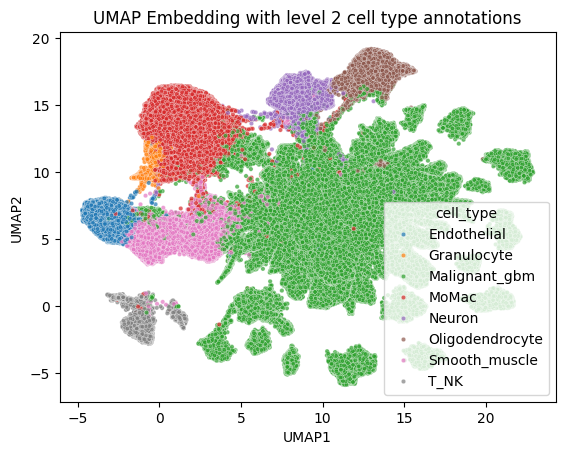

In [21]:
# Visualize single-cell UMAP coloured by level 2 cell type annotations
embedding = single_cell_obj.obsm["X_umap"][:, :2]
df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
df["cell_type"] = single_cell_obj.obs["celltype_level2_scanvi"].values
sns.scatterplot(
    data=df,
    x="UMAP1",
    y="UMAP2",
    hue="cell_type",
    palette="tab10",
    s=10,
    alpha=0.7
)
plt.title("UMAP Embedding with level 2 cell type annotations")
plt.show()

#### 5. Spatial transcriptomic (Visium) data
The `notebooks/visium_starter_mosaic.ipynb` Notebook provides more information on how to process and explore Visium data.

In [22]:
# Load Visium data
visium_obj = MosaicDataset.load_visium(
    sample_list=["HK_G_022a_vis", "HK_G_024a_vis", "HK_G_030a_vis"], # remove this argument to load all available samples
    resolution="hires"
)

Resolution of the spatial image to load:  hires
You can change the resolution by setting the resolution parameter using the resolution argument.
Loading Visium data, this can take few minutes...


#### 6. Aligned H&E images

In [23]:
# Load the H&E slides
he = source_dict_mosaic["he"]["HE files"]
he.head(2)

,path,patient id
Subject Id,,
HK_G_001a,/home/ec2-user/SageMaker/data/mosaic_dataset/V...,HK_G_001
HK_G_002a,/home/ec2-user/SageMaker/data/mosaic_dataset/V...,HK_G_002


In [24]:
he.index

Index(['HK_G_001a', 'HK_G_002a', 'HK_G_003a', 'HK_G_004a', 'HK_G_005a',
       'HK_G_006a', 'HK_G_007a', 'HK_G_008a', 'HK_G_009a', 'HK_G_010a',
       'HK_G_011a', 'HK_G_012a', 'HK_G_013a', 'HK_G_014a', 'HK_G_015a',
       'HK_G_016a', 'HK_G_017b', 'HK_G_018a', 'HK_G_019a', 'HK_G_020a',
       'HK_G_021a', 'HK_G_022a', 'HK_G_023a', 'HK_G_024a', 'HK_G_025a',
       'HK_G_026a', 'HK_G_027a', 'HK_G_028a', 'HK_G_029b', 'HK_G_030a',
       'HK_G_031a', 'HK_G_032a', 'HK_G_033a', 'HK_G_034a', 'HK_G_035a',
       'HK_G_036b', 'HK_G_037a', 'HK_G_039a', 'HK_G_040a', 'HK_G_041a',
       'HK_G_042a', 'HK_G_043a', 'HK_G_044b', 'HK_G_045a', 'HK_G_046a',
       'HK_G_047a', 'HK_G_048a', 'HK_G_049a', 'HK_G_050a', 'HK_G_051a',
       'HK_G_052a', 'HK_G_053a', 'HK_G_054a', 'HK_G_055a', 'HK_G_056a',
       'HK_G_057a', 'HK_G_058a', 'HK_G_059b', 'HK_G_060a', 'HK_G_062a',
       'HK_G_063a', 'HK_G_066a', 'HK_G_067a', 'HK_G_070a', 'HK_G_071a',
       'HK_G_072a', 'HK_G_080a', 'HK_G_082b', 'HK_G_083a', 'HK_G

In [25]:
he.reset_index().loc[he.index == 'HK_G_030a']

,Subject Id,path,patient id
29,HK_G_030a,/home/ec2-user/SageMaker/data/mosaic_dataset/V...,HK_G_030


In [26]:
he.shape

(86, 2)

In [27]:
he.iloc[29].path

PosixPath('/home/ec2-user/SageMaker/data/mosaic_dataset/Visium/converted_he/HK_G_030a_vis.tif')

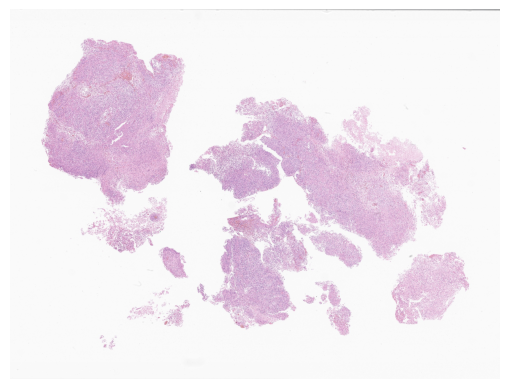

In [28]:
# Display a H&E slide
slide_idx = 29  # pick a H&E slide to display

slide = tiffslide.TiffSlide(he.path.values[slide_idx])

# Display the slide
slide_img = slide.get_thumbnail(slide.level_dimensions[-2])
fig, ax = plt.subplots()
ax.imshow(slide_img)
ax.set_axis_off()
plt.show()

In [29]:
# Load the H1 Bioptimus features paths for each subject
h1 = source_dict_mosaic["he"]["H1 features"]
h1.head(2)

,path,patient id
Subject Id,,
HK_G_001a,/home/ec2-user/SageMaker/data/h1_bioptimus_fea...,HK_G_001
HK_G_002a,/home/ec2-user/SageMaker/data/h1_bioptimus_fea...,HK_G_002


In [30]:
# Load the H1 features for one sample

slide_idx = 12  # pick a H&E slide to display

# Load the H1 zarr object for the selected slide
h1_zarr = zarr.open(h1.path.values[slide_idx], mode='r')

h1_emb = h1_zarr["emb"][:]  # (n tiles, n features) np array H1 features
h1_coords = h1_zarr["coords"][:]  # (n tiles, 2) np array coordinates
h1_level = h1_zarr["level"][:]  # (n tiles, 1) np array level of resolution


## Start exploring the BRUCE Data

In [31]:
# Look at the available data sources
BruceDataset.sources.keys()

dict_keys(['metadata', 'mibi_images'])

In [32]:
# Load the metadata table
source_dict_bruce = BruceDataset.load_tabular()

In [33]:
metadata = source_dict_bruce["metadata"]["metadata"]
metadata.head(2)

,patient_id,fov_immune,fov_tumor,site,who_grade,final_diagnosis,final_diagnosis_simple,who_diagnosis,tumor_region,anatomical_location,...,egfr_egfrvIII_status,row,column,combined_label,TMA_Patient,alignment_status,comp_1,MIBI,MALDI,NS
sample_id,,,,,,,,,,,,,,,,,,,,,
Stanford-100,1777,Stanford_TA552_R1C4,Stanford_TA552_R1C4,Stanford,4,GBM,GBM,4 - GBM,tumor_core_to_infiltrating,CEREBRUM_LEFT_TEMPORAL,...,unk,1,4,R1C4,33707_1,1,other,MIBI,MALDI,NS
Stanford-104,60074,Stanford_TA552_R2C4,Stanford_TA552_R2C4,Stanford,4,GBM,GBM,4 - GBM,tumor_core_to_infiltrating,CEREBRUM_RIGHT_TEMPORAL,...,unk,2,4,R2C4,33708_1,0,other,MIBI,MALDI,NS


### Load a MIBI image

In [34]:
source_dict_bruce.keys()

dict_keys(['metadata', 'mibi_images'])

In [35]:
# Load the information on the image
mibi_immune = source_dict_bruce["mibi_images"]["immune"] # you can also choose "tumor"
mibi_immune.head(2)

,path,marker
sample_id,,
Stanford_TA551_R10C4,/home/ec2-user/SageMaker/data/bruce_dataset/St...,Arginase1
Stanford_TA551_R10C4,/home/ec2-user/SageMaker/data/bruce_dataset/St...,Au


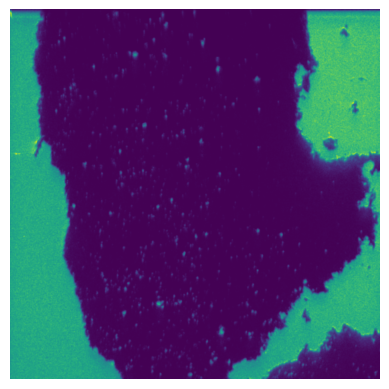

In [36]:
# Display for one sample and one immune marker of interest
img_idx = 1
img = tifffile.imread(mibi_immune.path.values[img_idx])

# Normalize the image to the range [0, 1]
img_normalized = (img - img.min()) / (img.max() - img.min())

# Display the normalized image
plt.imshow(img_normalized)
plt.axis('off')
plt.show()